In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
cust=pd.read_csv("cust.csv")
acct=pd.read_csv("acct.csv")
trans=pd.read_csv("tran.csv")

In [2]:
trans
trans=trans.drop(['locationRegion','locationCity','accountId'],axis=1)
trans=trans.rename(columns={'Unnamed: 0': "SerialNo"})

In [3]:
total_balance=acct.groupby(['cust_id'])[['balance']].sum().reset_index()
data=pd.merge(cust,total_balance,how="inner",left_on='id',right_on='cust_id')
data=data.drop(['Unnamed: 0','cust_id','type','workActivity','addresses_principalResidence_province','schoolAttendance','schools'],axis=1)
data 

,id,gender,birthDate,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,balance
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Male,12/26/1985,NaN,0.00,Single,Group,0.00
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Female,1/30/1977,5221 Depository credit intermediation,40009.20,Married,With Spouse,39306.34
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Female,11/22/2003,NaN,0.00,Single,With Parent,122.16
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Other,5/7/1983,"5412 Accounting, tax preparation, bookkeeping ...",44709.00,Married,With Spouse,43687.72
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Male,1/29/1983,4855 Charter bus industry,21496.00,Single,With Parent,23456.30
...,...,...,...,...,...,...,...,...
5640,fe51c153-fbec-4b64-9b00-2530035ef0e1_d25e64c5-...,Female,9/17/1956,"5111 Newspaper, periodical, book and director ...",33060.95,Married,With Spouse,20443.75
5641,fe51c153-fbec-4b64-9b00-2530035ef0e1_55d08cd9-...,Male,12/26/1985,9120 Provincial and territorial public adminis...,39959.00,Married,With Spouse,30817.58
5642,fe51c153-fbec-4b64-9b00-2530035ef0e1_8e9029ec-...,Male,11/23/1960,5415 Computer systems design and related services,40011.95,Married,With Spouse,40829.18
5643,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d20f907-...,Male,11/23/1928,Retired,61873.00,Widowed,NaN,33876.02


In [4]:
df = pd.merge(trans,data,left_on='customerId',right_on='id', how='left')
df

,SerialNo,description,currencyAmount,originationDateTime,customerId,merchantId,categoryTags,id,gender,birthDate,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,balance
0,0,ADP PMT 59964899,1092.22,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,NaN,Income,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,Female,11/21/1969,6220 Hospitals (6221 to 6223),28397.60,Married,With Spouse,28283.09
1,1,ADP PMT 78870688,701.11,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,NaN,Income,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,Male,6/10/1995,"2211 Electric power generation, transmission a...",18228.87,Single,With Spouse,9432.24
2,2,ROGERS CABLE E2I6X9,111.98,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,Bills and Utilities,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,Female,9/17/1970,5221 Depository credit intermediation,42524.90,Divorced,With Spouse,33204.10
3,3,TIM HORTONS #990 _F,1.16,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,Food and Dining,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,Male,7/13/1999,NaN,0.00,Single,With Parent,101.75
4,4,EMAIL TFR C0***oHp,41.00,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,NaN,Transfer,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,Male,9/16/1982,5615 Travel arrangement and reservation services,34359.00,Single,With Parent,39127.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92299,92299,MCDONALD'S #11273 QPS,7.41,2018-05-04T12:39:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_0138b39d-...,9104ad1d-7927-4734-93b6-5ae5af2d4e12,Food and Dining,fe51c153-fbec-4b64-9b00-2530035ef0e1_0138b39d-...,Male,9/18/1998,6213 Offices of other health practitioners,51449.64,Single,NaN,38820.26
92300,92300,BELL CANADA M1B6P4,113.42,2018-05-07T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_975020be-...,338b9026-ebdd-4f32-8e01-4a46572b0d65,Bills and Utilities,fe51c153-fbec-4b64-9b00-2530035ef0e1_975020be-...,Female,11/23/1962,5411 Legal services,63373.05,Divorced,With Spouse,65605.78
92301,92301,ADP PMT 68888355,3484.64,2018-05-03T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_971442e4-...,NaN,Income,fe51c153-fbec-4b64-9b00-2530035ef0e1_971442e4-...,Female,6/10/1953,7222 Limited-service restaurants,90600.55,Married,With Spouse,86124.51
92302,92302,MCDONALD'S #29047 QPS,5.91,2018-07-12T07:46:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_c68e5395-...,6d0575a5-33f9-415c-ad96-0e1484e1e0f6,Food and Dining,fe51c153-fbec-4b64-9b00-2530035ef0e1_c68e5395-...,Female,5/7/2001,NaN,0.00,Single,With Parent,159.48


In [5]:
df.apply(lambda x: sum(x.isnull()))

SerialNo                   0
description                0
currencyAmount             0
originationDateTime        0
customerId                 0
merchantId             49006
categoryTags             144
id                         0
gender                     0
birthDate                  0
occupationIndustry     16518
totalIncome                0
relationshipStatus         0
habitationStatus       11463
balance                    0
dtype: int64

In [6]:
df['habitationStatus']    = df['habitationStatus'].replace(np.nan, 'Single')
df['originationDateTime'] = df['originationDateTime'].map(lambda x: x.split('T', 1)[0])
df['originationDateTime']=pd.to_datetime(df['originationDateTime'], format='%Y/%m/%d')
df['birthDate']=pd.to_datetime(df['birthDate'], format='%m/%d/%Y')
df['Age']=((df.originationDateTime-df.birthDate)/365).dt.days.astype('int16')
bins= [10,20,30,40,50,60,70,110]
labels = ['10-20','20-30','30-40','40-50','50-60', '60-70','70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

<IPython.core.display.Javascript object>

In [7]:
import datetime
max_date = max(df.originationDateTime) + datetime.timedelta(days=1)
customers = df.groupby(['customerId']).agg({
    'originationDateTime': lambda x: (max_date - x.max()).days,
    'SerialNo': 'count',
    'currencyAmount': 'sum'})
# Rename columns
customers.rename(columns = {'originationDateTime': 'Recency',
                            'SerialNo': 'Frequency',
                            'currencyAmount': 'MonetaryValue'}, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

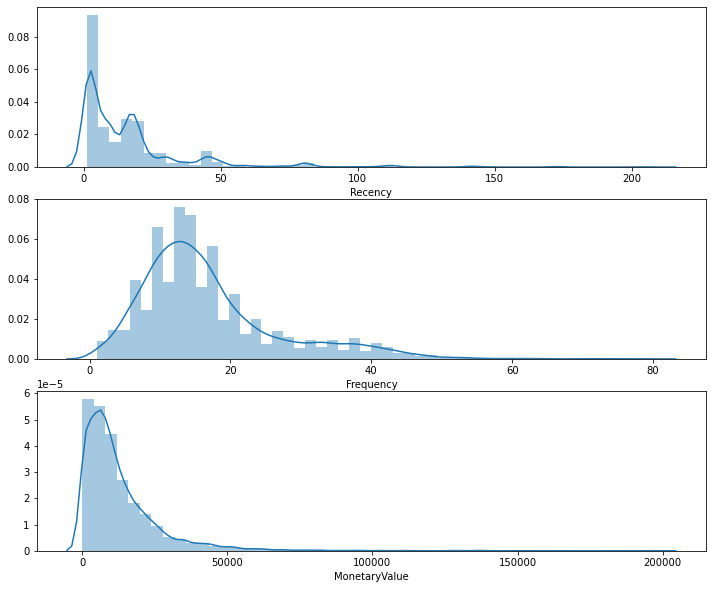

In [8]:
plt.figure(figsize=(12,10)) # Figure size
plt.subplot(3, 1, 1)
sns.distplot(customers['Recency'])# Plot distribution of R_Value
plt.subplot(3, 1, 2) 
sns.distplot(customers['Frequency'])# Plot distribution of F_Value
plt.subplot(3, 1, 3)
sns.distplot(customers['MonetaryValue'])# Plot distribution of M_Value
plt.show()

In [9]:
#Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(customers['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(customers['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
customers = customers.assign(R_Score = r_groups.values, F_Score = f_groups.values)
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(customers['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
customers = customers.assign(M_Score = m_groups.values)
customers.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score
customerId,,,,,,
fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-8e07-4751-a84d-7b915d9066a2,1,61,17271.44,4,4,4
fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-153b-4265-8145-9df1e472d08f,22,23,4289.16,1,4,1
fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-533f-4ee9-8fbd-46c06e9514ef,10,12,336.00,3,2,1
fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-9a03-4624-bd14-aca494a734aa,19,4,856.23,2,1,1
fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-484e-4406-973b-947e4fdb8ce4,1,9,14697.94,4,1,3


In [10]:
#Adding R,F,M Scores to one new column
customers['RFM_Score'] = customers.R_Score.astype(str)+ customers.F_Score.astype(str) + customers.M_Score.astype(str)
customers.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
customerId,,,,,,,
fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-8e07-4751-a84d-7b915d9066a2,1,61,17271.44,4,4,4,444
fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-153b-4265-8145-9df1e472d08f,22,23,4289.16,1,4,1,141
fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-533f-4ee9-8fbd-46c06e9514ef,10,12,336.00,3,2,1,321
fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-9a03-4624-bd14-aca494a734aa,19,4,856.23,2,1,1,211
fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-484e-4406-973b-947e4fdb8ce4,1,9,14697.94,4,1,3,413


In [11]:
customers['RFM_Score'].nunique()
#len(customers_fix['RFM_Score'].unique())

64

In [12]:
customers['RFM_Total_Score'] = customers[['R_Score','F_Score','M_Score']].sum(axis=1)
customers['RFM_Total_Score'].unique()

array([12,  6,  4,  8,  7, 11, 10,  9,  3,  5], dtype=int64)

In [13]:
customers[customers['RFM_Score']=='111'].sort_values('MonetaryValue', ascending=False).head(10)

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score
customerId,,,,,,,,
fe51c153-fbec-4b64-9b00-2530035ef0e1_efbc524e-75f8-46f0-8de8-7307fe598a79,112,4,4285.2705,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_3a3d6873-4a33-4263-88ad-c803a411ed03,46,8,4265.8200,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_3ff126e7-4f7e-43e5-9ffe-dfd2538574a0,50,5,4221.5161,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_c32191ae-daf2-496b-9213-a451d506597e,109,6,4204.9710,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_cdc27c34-89c3-4784-add1-cd16c1841735,91,5,4176.9690,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_42c429e8-e17d-4765-a137-1058e99c6a0f,50,4,4153.9600,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_4dc0d594-dca5-4280-bbfc-5238993f2302,142,3,4153.7910,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_90d7da36-c33b-4bb9-ab33-6300a21e2367,26,8,4118.0000,1,1,1,111,3
fe51c153-fbec-4b64-9b00-2530035ef0e1_3042d2bc-5530-4705-9115-30ac82d270f2,54,10,4100.8200,1,1,1,111,3


In [14]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Total_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Total_Score'] >= 8) and (df['RFM_Total_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Total_Score'] >= 7) and (df['RFM_Total_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Total_Score'] >= 6) and (df['RFM_Total_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Total_Score'] >= 5) and (df['RFM_Total_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Total_Score'] >= 4) and (df['RFM_Total_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Lost'


In [15]:
# Create a new variable RFM_Level
customers['Customer_Segmentation'] = customers.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
customers.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
customerId,,,,,,,,,
fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-8e07-4751-a84d-7b915d9066a2,1,61,17271.44,4,4,4,444,12,Can't Loose Them
fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-153b-4265-8145-9df1e472d08f,22,23,4289.16,1,4,1,141,6,Potential
fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-533f-4ee9-8fbd-46c06e9514ef,10,12,336.00,3,2,1,321,6,Potential
fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-9a03-4624-bd14-aca494a734aa,19,4,856.23,2,1,1,211,4,Needs Attention
fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-484e-4406-973b-947e4fdb8ce4,1,9,14697.94,4,1,3,413,8,Champions


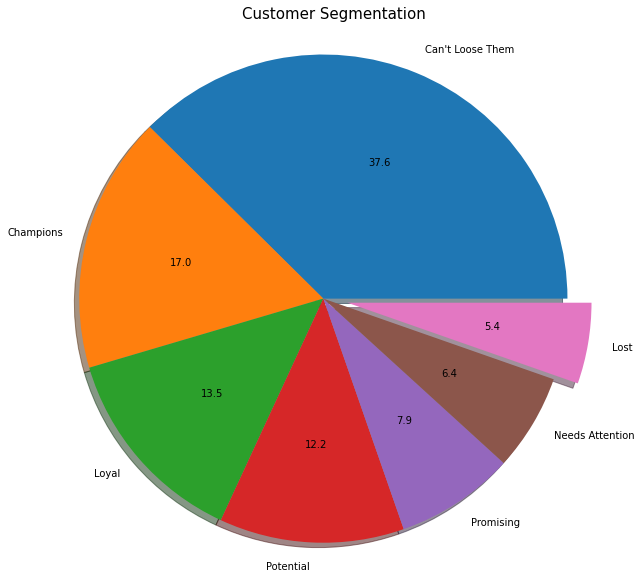

In [16]:
# Calculate average values for each RFM_Level, and return a size of each segment 
customers['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=0, explode=(0,0,0,0,0,0,0.1),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
# save
#plt.savefig('customer_segmentation.png')
plt.show()

In [17]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

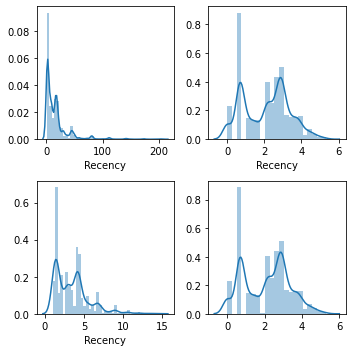

3.47


<IPython.core.display.Javascript object>

0.01


<IPython.core.display.Javascript object>

1.36
0.0


In [18]:
analyze_skewness('Recency')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

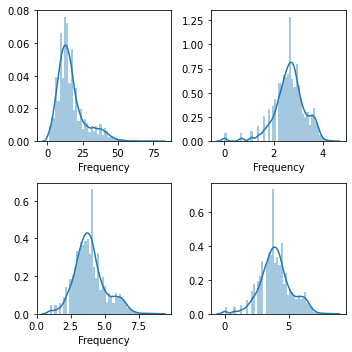

1.39


<IPython.core.display.Javascript object>

-0.73


<IPython.core.display.Javascript object>

0.53
0.04


In [19]:
analyze_skewness('Frequency')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

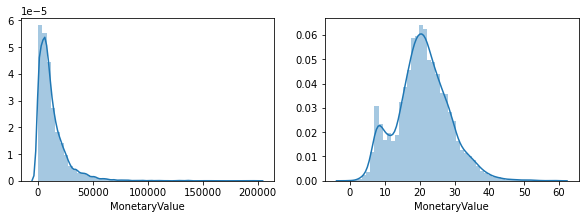

3.62


<IPython.core.display.Javascript object>

0.3


In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(customers['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [21]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

<IPython.core.display.Javascript object>

,Recency,Frequency,MonetaryValue
5478,2.190985,4.629439,17.757667
5479,2.762659,4.004064,29.142815
5480,2.933242,2.019602,42.122965
5481,0.692525,3.861225,29.844959
5482,2.073853,4.394700,22.651137


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[ 0.  0. -0.]
[1. 1. 1.]


In [23]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-1.721265,2.894604,0.654259
1,0.784518,0.776248,-0.615516
2,0.147252,-0.354387,-1.844865
3,0.666125,-1.862818,-1.508457
4,-1.721265,-0.793946,0.475259


<IPython.core.display.Javascript object>

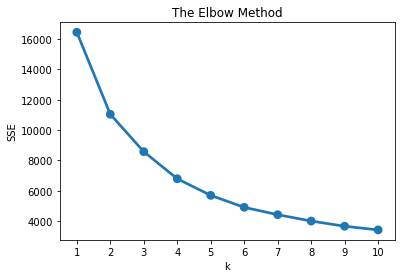

In [24]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
#plt.savefig("elbow.png")
plt.show()

In [25]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
customers["Cluster"] = model.labels_
customers

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation,Cluster
customerId,,,,,,,,,,
fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-8e07-4751-a84d-7b915d9066a2,1,61,17271.440,4,4,4,444,12,Can't Loose Them,2
fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-153b-4265-8145-9df1e472d08f,22,23,4289.160,1,4,1,141,6,Potential,0
fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-533f-4ee9-8fbd-46c06e9514ef,10,12,336.000,3,2,1,321,6,Potential,0
fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-9a03-4624-bd14-aca494a734aa,19,4,856.230,2,1,1,211,4,Needs Attention,0
fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-484e-4406-973b-947e4fdb8ce4,1,9,14697.940,4,1,3,413,8,Champions,2
...,...,...,...,...,...,...,...,...,...,...
fe51c153-fbec-4b64-9b00-2530035ef0e1_ff98936a-b3b0-4e79-9b9f-95790b929930,9,20,5599.609,3,3,2,332,8,Champions,2
fe51c153-fbec-4b64-9b00-2530035ef0e1_ffaccfae-05e2-489c-b4ab-ab8866577449,16,15,24751.100,2,3,4,234,9,Can't Loose Them,1
fe51c153-fbec-4b64-9b00-2530035ef0e1_ffb2ffed-4eb8-4a29-b47d-dd9111e3ee61,19,5,74740.640,2,1,4,214,7,Loyal,1


In [26]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.8       9.8        5985.8  1799
1          14.0      16.4       25381.5  1820
2           3.3      24.0        7228.2  1864

In [27]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
customers=customers.reset_index()

In [28]:
df_normalized=pd.merge(df_normalized,customers[['customerId','Customer_Segmentation']],left_on='ID',right_on='customerId', how='left')
df_normalized

,Recency,Frequency,MonetaryValue,ID,Cluster,customerId,Customer_Segmentation
0,-1.721265,2.894604,0.654259,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,2,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,Can't Loose Them
1,0.784518,0.776248,-0.615516,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,0,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,Potential
2,0.147252,-0.354387,-1.844865,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,0,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,Potential
3,0.666125,-1.862818,-1.508457,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,Needs Attention
4,-1.721265,-0.793946,0.475259,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,2,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,Champions
...,...,...,...,...,...,...,...
5478,0.061996,0.516198,-0.415817,fe51c153-fbec-4b64-9b00-2530035ef0e1_ff98936a-...,2,fe51c153-fbec-4b64-9b00-2530035ef0e1_ff98936a-...,Champions
5479,0.527286,0.011070,1.089875,fe51c153-fbec-4b64-9b00-2530035ef0e1_ffaccfae-...,1,fe51c153-fbec-4b64-9b00-2530035ef0e1_ffaccfae-...,Can't Loose Them
5480,0.666125,-1.591817,2.806507,fe51c153-fbec-4b64-9b00-2530035ef0e1_ffb2ffed-...,1,fe51c153-fbec-4b64-9b00-2530035ef0e1_ffb2ffed-...,Loyal
5481,-1.157613,-0.104303,1.182734,fe51c153-fbec-4b64-9b00-2530035ef0e1_ffeb4d4f-...,1,fe51c153-fbec-4b64-9b00-2530035ef0e1_ffeb4d4f-...,Can't Loose Them


<IPython.core.display.Javascript object>

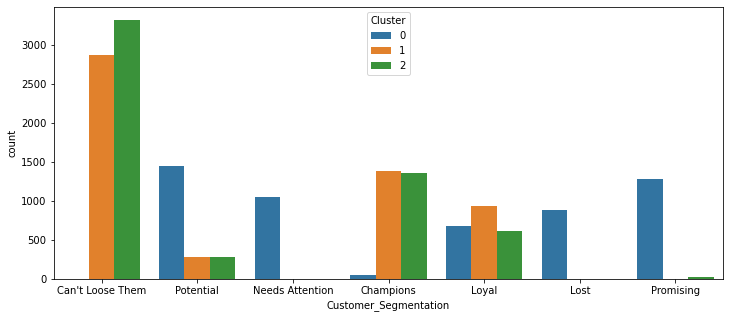

In [29]:
# Melt The Data
df_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster','Customer_Segmentation'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
plt.figure(figsize=(12,5))
sns.countplot(x='Customer_Segmentation',hue='Cluster',data=df_melt)
#plt.savefig('cluster.png')